In [1]:
import math

import pandas as pd
from IPython import get_ipython
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from numpy import longdouble
from scipy.optimize import curve_fit

from model import CalculateFeatures
from model.utils import minimum_year_analysis, b_slope_analysis
import numpy as np
pdf = pd.DataFrame

%matplotlib qt
# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import model

In [2]:
USE_CACHED_FEATURES=True
MAGNITUDE_THRESHOLD=6.0
WINDOW_SIZE=100

In [3]:
df = model.load_data('../../data/DATA_2.csv')

C:\Users\fof\PycharmProjects\SeismicPrediction\model\calculate_features.py:169: RuntimeWarning: invalid value encountered in longdouble_scalars
  return (unique_n * np.sum(unique_M * log_unique_N) - np.sum(unique_M) * np.sum(log_unique_N)) / ( np.power(np.sum(unique_M), 2) - (unique_n * np.sum(np.power(unique_M, 2))))


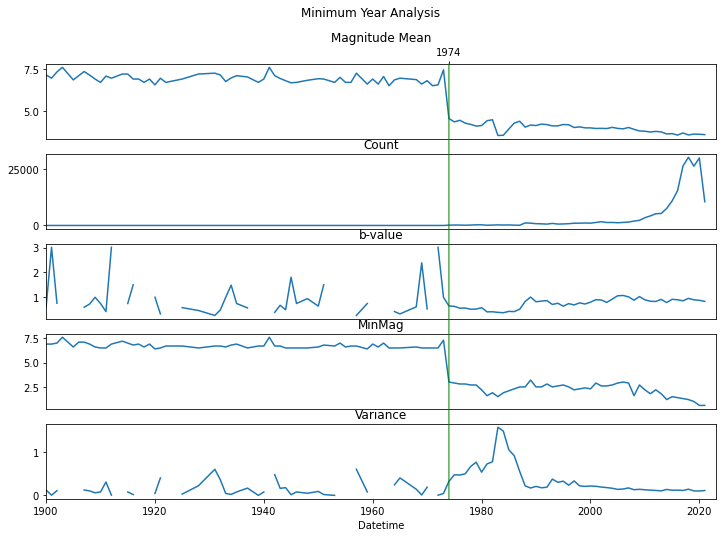

In [5]:
%matplotlib inline
minimum_year_analysis(df, [1974],[1900,2023])

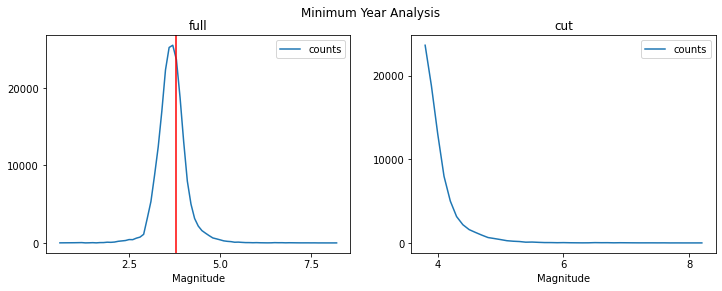

In [6]:
%matplotlib inline
b_slope_analysis(df, 3.8)


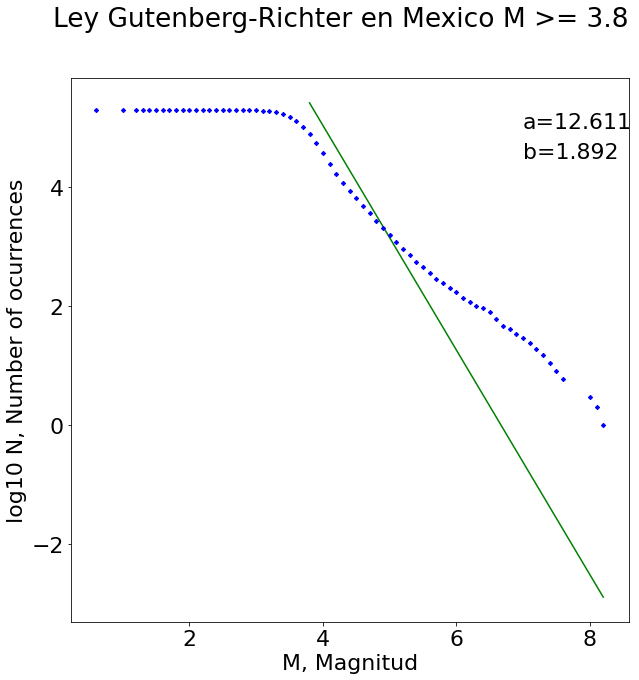

In [29]:

y = np.array(list(map(lambda x : model.CalculateFeatures.log_gutenberg_richter_law(x,a_mlk,b_mlk),unique)))

%matplotlib inline

plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots()
fig.suptitle('Ley Gutenberg-Richter en Mexico M >= 3.8')
fig.set_size_inches(10, 10)
axes.set_ylabel("log10 N, Number of ocurrences")
axes.set_xlabel("M, Magnitud")
axes.plot(unique,y,"g")
axes.plot(unique2,np.log10(counts2.astype(longdouble),dtype=longdouble),"bD",markersize=3)

axes.annotate('a=%.3f'%a_mlk, xy=(2, 1), xytext=(7, 5))
axes.annotate('b=%.3f'%b_mlk, xy=(2, 1), xytext=(7, 4.5))

plt.show()